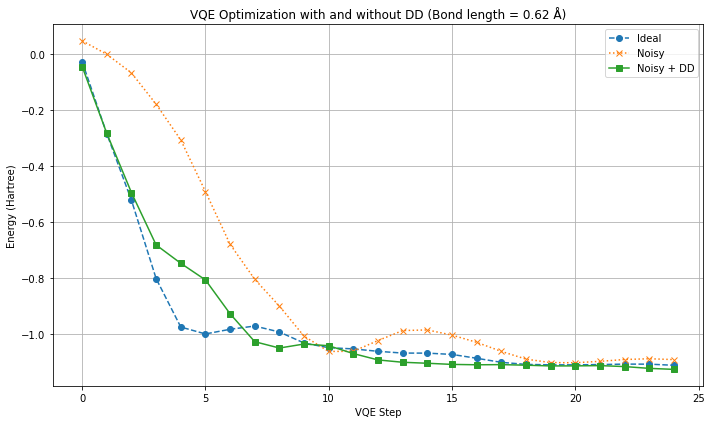

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

paths = {
    "ideal": "VQA+DD - ideal_0.62_h2.csv",
    "noisy": "VQA+DD - noisy_0.62_h2.csv",
    "dd": "VQA+DD - dd_0.62_h2.csv"
}

df_ideal = pd.read_csv(paths["ideal"])
df_noisy = pd.read_csv(paths["noisy"])
df_dd = pd.read_csv(paths["dd"])

plt.figure(figsize=(10, 6))
plt.plot(df_ideal["Step"], df_ideal["Energy (Hartree)"], label="Ideal", linestyle='--', marker='o')
plt.plot(df_noisy["Step"], df_noisy["Energy (Hartree)"], label="Noisy", linestyle=':', marker='x')
plt.plot(df_dd["Step"], df_dd["Energy (Hartree)"], label="Noisy + DD", linestyle='-', marker='s')

plt.xlabel("VQE Step")
plt.ylabel("Energy (Hartree)")
plt.title("VQE Optimization with and without DD (Bond length = 0.62 Å)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("vqe_dd_comparison_0.62A.png", dpi=300, bbox_inches='tight')
plt.show()


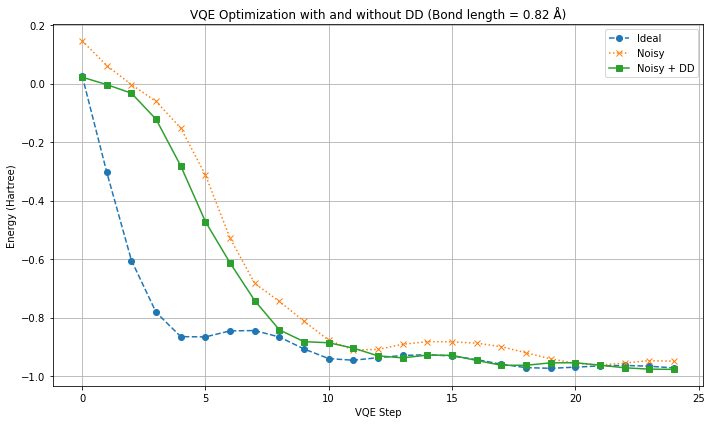

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

paths = {
    "ideal": "VQA+DD - ideal_0.82_h2.csv",
    "noisy": "VQA+DD - noisy_0.82_h2.csv",
    "dd": "VQA+DD - dd_0.82_h2.csv"
}

df_ideal = pd.read_csv(paths["ideal"])
df_noisy = pd.read_csv(paths["noisy"])
df_dd = pd.read_csv(paths["dd"])

plt.figure(figsize=(10, 6))
plt.plot(df_ideal["Step"], df_ideal["Energy (Hartree)"], label="Ideal", linestyle='--', marker='o')
plt.plot(df_noisy["Step"], df_noisy["Energy (Hartree)"], label="Noisy", linestyle=':', marker='x')
plt.plot(df_dd["Step"], df_dd["Energy (Hartree)"], label="Noisy + DD", linestyle='-', marker='s')

plt.xlabel("VQE Step")
plt.ylabel("Energy (Hartree)")
plt.title("VQE Optimization with and without DD (Bond length = 0.82 Å)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("vqe_dd_comparison_0.82A.png", dpi=300, bbox_inches='tight')
plt.show()


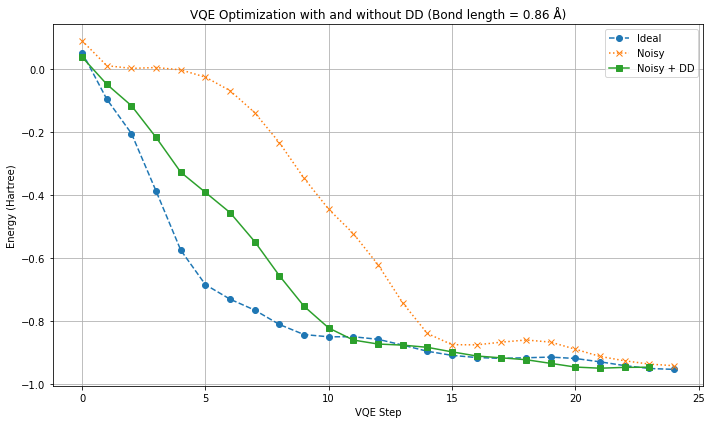

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

paths = {
    "ideal": "VQA+DD - ideal_0.86_h2.csv",
    "noisy": "VQA+DD - noisy_0.86_h2.csv",
    "dd": "VQA+DD - dd_0.86_h2.csv"
}

df_ideal = pd.read_csv(paths["ideal"])
df_noisy = pd.read_csv(paths["noisy"])
df_dd = pd.read_csv(paths["dd"])

plt.figure(figsize=(10, 6))
plt.plot(df_ideal["Step"], df_ideal["Energy (Hartree)"], label="Ideal", linestyle='--', marker='o')
plt.plot(df_noisy["Step"], df_noisy["Energy (Hartree)"], label="Noisy", linestyle=':', marker='x')
plt.plot(df_dd["Step"], df_dd["Energy (Hartree)"], label="Noisy + DD", linestyle='-', marker='s')

plt.xlabel("VQE Step")
plt.ylabel("Energy (Hartree)")
plt.title("VQE Optimization with and without DD (Bond length = 0.86 Å)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("vqe_dd_comparison_0.86A.png", dpi=300, bbox_inches='tight')
plt.show()


Bond length: 0.62 Å


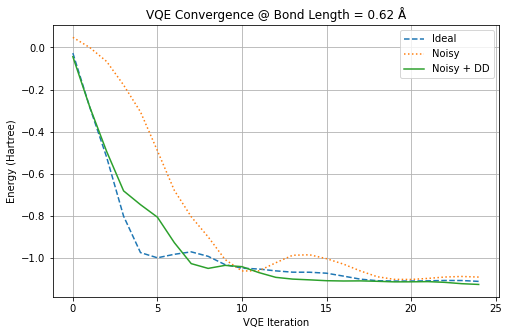

Final Energy (Ideal):     -1.112610 Hartree
Final Energy (Noisy):     -1.092163 Hartree
Final Energy (Noisy + DD):-1.127217 Hartree
Execution time (Ideal):     0.91s
Execution time (Noisy):     20.00s
Execution time (Noisy + DD):27.65s


Bond length: 0.82 Å


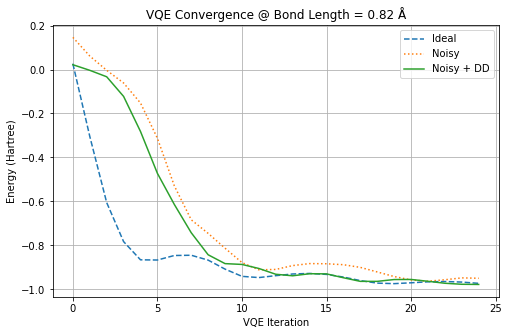

Final Energy (Ideal):     -0.972283 Hartree
Final Energy (Noisy):     -0.949198 Hartree
Final Energy (Noisy + DD):-0.977295 Hartree
Execution time (Ideal):     0.94s
Execution time (Noisy):     19.92s
Execution time (Noisy + DD):27.38s


Bond length: 0.86 Å


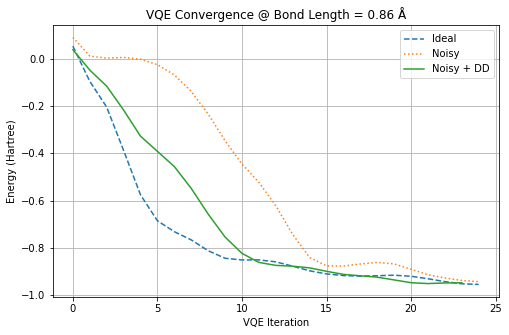

Final Energy (Ideal):     -0.954417 Hartree
Final Energy (Noisy):     -0.942784 Hartree
Final Energy (Noisy + DD):-0.950476 Hartree
Execution time (Ideal):     0.93s
Execution time (Noisy):     5.68s
Execution time (Noisy + DD):7.63s




In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Define bond lengths and corresponding file paths
bond_lengths = ["0.62", "0.82", "0.86"]
modes = ["ideal", "noisy", "dd"]

file_map = {
    "ideal": "VQA+DD - ideal_{}_h2.csv",
    "noisy": "VQA+DD - noisy_{}_h2.csv",
    "dd": "VQA+DD - dd_{}_h2.csv"
}

# Loop through each bond length and generate plots + stats
for bond in bond_lengths:
    print(f"Bond length: {bond} Å")
    
    # Load CSVs
    df_ideal = pd.read_csv(file_map["ideal"].format(bond))
    df_noisy = pd.read_csv(file_map["noisy"].format(bond))
    df_dd = pd.read_csv(file_map["dd"].format(bond))

    # Plot energy per step
    plt.figure(figsize=(8, 5))
    plt.plot(df_ideal["Step"], df_ideal["Energy (Hartree)"], label="Ideal", linestyle='--')
    plt.plot(df_noisy["Step"], df_noisy["Energy (Hartree)"], label="Noisy", linestyle=':')
    plt.plot(df_dd["Step"], df_dd["Energy (Hartree)"], label="Noisy + DD", linestyle='-')
    plt.xlabel("VQE Iteration")
    plt.ylabel("Energy (Hartree)")
    plt.title(f"VQE Convergence @ Bond Length = {bond} Å")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print final energy values
    energy_ideal = df_ideal["final_energy"].dropna().values[0]
    energy_noisy = df_noisy["final_energy"].dropna().values[0]
    energy_dd = df_dd["final_energy"].dropna().values[0]
    print(f"Final Energy (Ideal):     {energy_ideal:.6f} Hartree")
    print(f"Final Energy (Noisy):     {energy_noisy:.6f} Hartree")
    print(f"Final Energy (Noisy + DD):{energy_dd:.6f} Hartree")

    # Execution time comparison
    exec_ideal = df_ideal["execution_secs"].dropna().values[0]
    exec_noisy = df_noisy["execution_secs"].dropna().values[0]
    exec_dd = df_dd["execution_secs"].dropna().values[0]
    print(f"Execution time (Ideal):     {exec_ideal:.2f}s")
    print(f"Execution time (Noisy):     {exec_noisy:.2f}s")
    print(f"Execution time (Noisy + DD):{exec_dd:.2f}s")
    print("\n")


In [13]:
from scipy.stats import ttest_ind

# Truncate to first 11 steps (step 0 to step 10)
early_noisy = df_noisy[df_noisy["Step"] <= 10]["Energy (Hartree)"]
early_dd = df_dd[df_dd["Step"] <= 10]["Energy (Hartree)"]

# Perform t-test on early steps
t_stat_early, p_val_early = ttest_ind(early_noisy, early_dd)

print("Statistical Comparison (Steps 0-10)")
print(f"Mean Energy (Noisy):     {early_noisy.mean():.6f}")
print(f"Mean Energy (Noisy + DD):{early_dd.mean():.6f}")
print(f"T-test p-value: {p_val_early:.4f}")

if p_val_early < 0.05:
    print("→ Statistically significant improvement with DD in early steps.")
else:
    print("→ No statistically significant difference in early steps.")


Statistical Comparison (Steps 0-10)
Mean Energy (Noisy):     -0.104941
Mean Energy (Noisy + DD):-0.391157
T-test p-value: 0.0100
→ Statistically significant improvement with DD in early steps.


In [20]:
from scipy.stats import ttest_ind
import pandas as pd

# Define bond lengths and the corresponding filenames
bond_lengths = [0.62, 0.82, 0.86]
noisy_prefix = "VQA+DD - noisy_"
dd_prefix = "VQA+DD - dd_"
suffix = "_h2.csv"

# Accumulate early-step (0–10) energy values across all bond lengths
early_noisy_all = []
early_dd_all = []

for bond in bond_lengths:
    noisy_file = f"{noisy_prefix}{bond}{suffix}"
    dd_file = f"{dd_prefix}{bond}{suffix}"
    
    df_noisy = pd.read_csv(noisy_file)
    df_dd = pd.read_csv(dd_file)
    
    # Use 'Step' or fix column names if needed
    df_noisy.columns = [col.strip().lower() for col in df_noisy.columns]
    df_dd.columns = [col.strip().lower() for col in df_dd.columns]

    early_noisy = df_noisy[df_noisy["step"] <= 12]["energy (hartree)"].dropna()
    early_dd = df_dd[df_dd["step"] <= 12]["energy (hartree)"].dropna()

    early_noisy_all.extend(early_noisy)
    early_dd_all.extend(early_dd)

# Perform an independent t-test across all early steps from all bond lengths
t_stat, p_value = ttest_ind(early_noisy_all, early_dd_all, equal_var=False)

print("Overall Statistical Comparison (Steps 0–10 across all bond lengths)")
print(f"  Mean Energy (Noisy):     {pd.Series(early_noisy_all).mean():.6f}")
print(f"  Mean Energy (Noisy + DD):{pd.Series(early_dd_all).mean():.6f}")
print(f"  T-test p-value: {p_value:.4f}")

if p_value < 0.05:
    print("→ Statistically significant improvement with DD in early steps.")
else:
    print("→ No statistically significant improvement with DD.")


Overall Statistical Comparison (Steps 0–10 across all bond lengths)
  Mean Energy (Noisy):     -0.400727
  Mean Energy (Noisy + DD):-0.590821
  T-test p-value: 0.0311
→ Statistically significant improvement with DD in early steps.


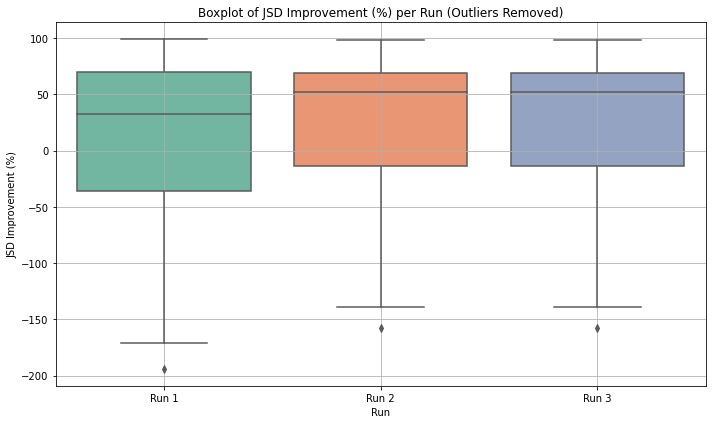

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# File paths
paths = {
    "Run 1": "vqadd_jsd_run1.csv",
    "Run 2": "vqadd_jsd_run2.csv",
    "Run 3": "vqadd_jsd_run3.csv"
}

# Load and clean data
dfs = []
for run, path in paths.items():
    df = pd.read_csv(path, sep=';', encoding='latin1')
    df.columns = [col.strip() for col in df.columns]
    df = df.applymap(lambda x: str(x).strip().replace(',', '.') if isinstance(x, str) else x)
    df["Run"] = run
    dfs.append(df)

# Combine
df_all = pd.concat(dfs, ignore_index=True)

# Convert types
df_all["JSD w/o DD"] = df_all["JSD w/o DD"].astype(float)
df_all["JSD with DD"] = df_all["JSD with DD"].astype(float)

# Compute improvement
df_all["JSD Improvement (%)"] = 100 * (df_all["JSD w/o DD"] - df_all["JSD with DD"]) / df_all["JSD w/o DD"]

# Filter out outliers
filtered_df = df_all[
    (df_all["JSD Improvement (%)"] >= -200) &
    (df_all["JSD Improvement (%)"] <= 200)
]

# Define custom colors
palette = sns.color_palette("Set2")

# Plot and save
plt.figure(figsize=(10, 6))
sns.boxplot(x="Run", y="JSD Improvement (%)", data=filtered_df, palette=palette)
plt.title("Boxplot of JSD Improvement (%) per Run (Outliers Removed)")
plt.ylabel("JSD Improvement (%)")
plt.grid(True)
plt.tight_layout()
plt.savefig("jsd_improvement_boxplot.png", dpi=300)  # Save the plot as PNG
plt.show()
